In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as polt
cancer = pd.read_csv('cancer.csv')
sns.countplot(x="Class",data=cancer)

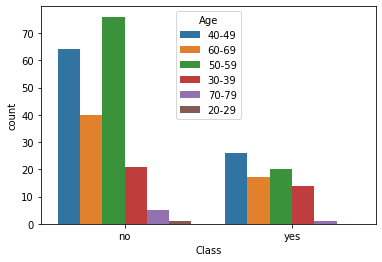

In [3]:
sns.countplot(x="Class",hue="Age",data=cancer)

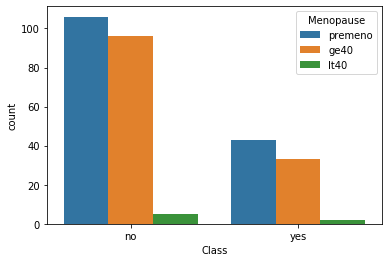

In [4]:
sns.countplot(x="Class",hue="Menopause",data=cancer)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
Class         285 non-null object
Age           285 non-null object
Menopause     285 non-null object
Tsize         285 non-null object
InvNodes      252 non-null object
NodeCaps      285 non-null object
DegMalig      285 non-null int64
Breast        285 non-null object
BreastQuad    285 non-null object
Irradi        285 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
cancer['Class'] = labelencoder_X.fit_transform(cancer.Class)
cancer['Age'] = labelencoder_X.fit_transform(cancer.Age)
cancer['Menopause'] = labelencoder_X.fit_transform(cancer.Menopause)
cancer['Tsize'] = labelencoder_X.fit_transform(cancer.Tsize)
cancer['NodeCaps'] = labelencoder_X.fit_transform(cancer.NodeCaps)
cancer['Breast'] = labelencoder_X.fit_transform(cancer.Breast)
cancer['BreastQuad'] = labelencoder_X.fit_transform(cancer.BreastQuad)
cancer['Irradi'] = labelencoder_X.fit_transform(cancer.Irradi)
print(cancer)

     Class  Age  Menopause  Tsize InvNodes  NodeCaps  DegMalig  Breast  \
0        0    2          2      3      0-2         1         2       1   
1        0    2          2      3      0-2         1         2       0   
2        0    4          0      2      0-2         1         2       1   
3        0    2          2      0      0-2         1         2       1   
4        0    4          0      2      0-2         1         2       0   
..     ...  ...        ...    ...      ...       ...       ...     ...   
280      1    1          2      5      0-2         1         2       0   
281      1    1          2      3      0-2         1         3       0   
282      1    4          0      3      0-2         1         1       1   
283      1    2          0      5      NaN         1         3       0   
284      1    3          0      5      NaN         1         3       0   

     BreastQuad  Irradi  
0             4       0  
1             1       0  
2             2       0  
3      

In [7]:
cancer.isnull()

,Class,Age,Menopause,Tsize,InvNodes,NodeCaps,DegMalig,Breast,BreastQuad,Irradi
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
280,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,True,False,False,False,False,False


In [8]:
cancer.isnull().sum()

Class          0
Age            0
Menopause      0
Tsize          0
InvNodes      33
NodeCaps       0
DegMalig       0
Breast         0
BreastQuad     0
Irradi         0
dtype: int64

In [9]:
cancer.drop(cancer.columns[[4]], axis = 1, inplace=True)

In [10]:
cancer.isnull().sum()

Class         0
Age           0
Menopause     0
Tsize         0
NodeCaps      0
DegMalig      0
Breast        0
BreastQuad    0
Irradi        0
dtype: int64

In [11]:
X=cancer.drop("Class",axis=1)
Y=cancer["Class"]

import time

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
start = time.time()
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)
Y_predict=logmodel.predict(X_test)
end = time.time()

print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))


from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

from sklearn import metrics
print("confusion matrix:")
print(metrics.confusion_matrix(Y_test,Y_predict))

mean_absolute_error = metrics.mean_absolute_error(Y_test,Y_predict, sample_weight=None, multioutput='uniform_average')
print("Mean absolute error: ",mean_absolute_error)

kappa_score = metrics.cohen_kappa_score(Y_test,Y_predict, labels=None, weights=None, sample_weight=None)
print("kappa score: ",kappa_score)

Execution time: 0.10339 seconds 

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        61
           1       0.57      0.32      0.41        25

    accuracy                           0.73        86
   macro avg       0.67      0.61      0.62        86
weighted avg       0.71      0.73      0.71        86

confusion matrix:
[[55  6]
 [17  8]]
Mean absolute error:  0.26744186046511625
kappa score:  0.25470987189148464


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
